In [1]:
import pandas as pd
import os
print(os.getcwd()) 
# Load the CSV file
file_path = 'hugo_boss_merged_output.csv'
df = pd.read_csv(file_path)

# Check the structure of the dataframe
df.head()


d:\Dropbox\FS Master\WS25\Strategy and Performance Management\Kununu_Fashion_and_Retail\Company_Benefits_Merged


,Job Title,Job Info,Job Details
0,STORE OPERATIONS COORDINATOR BOSS OUTLET (W/M/D),HUGO BOSS AG\r\nGermany\r\nWertheim\r\nCategor...,HUGO BOSS ist eines der führenden Fashion- und...
1,SUPPORTER SALES BOSS OUTLET (W/M/D),HUGO BOSS AG\r\nGermany\r\nWertheim\r\nCategor...,HUGO BOSS ist eines der führenden Fashion- und...
2,STOCKROOM COORDINATOR BOSS OUTLET (W/M/D),HUGO BOSS AG\r\nGermany\r\nWertheim\r\nCategor...,HUGO BOSS ist eines der führenden Fashion- und...
3,STORE MANAGER (W/M/D),HUGO BOSS AG\r\nGermany\r\nWertheim\r\nCategor...,HUGO BOSS ist eines der führenden Fashion- und...
4,ASSISTANT STORE MANAGER BOSS OUTLET (W/M/D),HUGO BOSS AG\r\nGermany\r\nWertheim\r\nCategor...,HUGO BOSS ist eines der führenden Fashion- und...


In [2]:
! pip install ace_tools

In [4]:
from collections import Counter
import re

# Split the job details into smaller paragraphs/sentences based on common sentence delimiters
# Assuming that paragraphs are separated by dots, commas, or new lines
all_paragraphs = []

for details in df['Job Details']:
    # Split by sentences, remove extra spaces, and add to the list
    paragraphs = re.split(r'[.!\n]', details)
    paragraphs = [para.strip() for para in paragraphs if para.strip()]  # Remove empty and whitespace-only strings
    all_paragraphs.extend(paragraphs)

# Count the frequency of each unique paragraph
paragraph_freq = Counter(all_paragraphs)

# Convert the results into a DataFrame for better visualization
paragraph_freq_df = pd.DataFrame(paragraph_freq.items(), columns=['Paragraph', 'Frequency']).sort_values(by='Frequency', ascending=False)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Paragraph Frequency", dataframe=paragraph_freq_df)


In [6]:
paragraph_freq_df.head()

,Paragraph,Frequency
30,Unsere integrative Kultur respektiert und schä...,75
29,Wir sind ein globales Unternehmen und unsere M...,75
16,Das ist dein Profil:,73
31,Wir setzen uns für Chancengleichheit im Einste...,73
21,Das bieten wir dir:,73


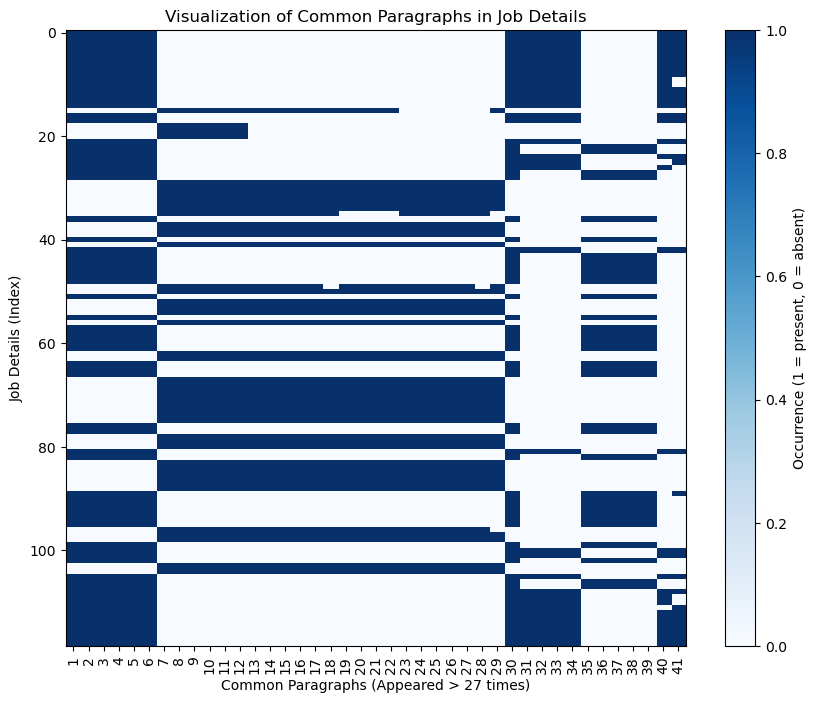

In [5]:
import matplotlib.pyplot as plt

# Filter paragraphs that appear more than 27 times
filtered_paragraphs = paragraph_freq_df[paragraph_freq_df['Frequency'] > 27]['Paragraph'].tolist()

# Create a binary matrix to check if these paragraphs appear in each job detail
job_details_contains_paragraphs = pd.DataFrame(0, index=df.index, columns=filtered_paragraphs)

for i, details in enumerate(df['Job Details']):
    for paragraph in filtered_paragraphs:
        if paragraph in details:
            job_details_contains_paragraphs.loc[i, paragraph] = 1

# Plot a heatmap to visualize the occurrence of these paragraphs in different job descriptions
plt.figure(figsize=(10, 8))
plt.imshow(job_details_contains_paragraphs, cmap='Blues', aspect='auto')
plt.colorbar(label='Occurrence (1 = present, 0 = absent)')
plt.xlabel('Common Paragraphs (Appeared > 27 times)')
plt.ylabel('Job Details (Index)')
plt.title('Visualization of Common Paragraphs in Job Details')
plt.xticks(ticks=range(len(filtered_paragraphs)), labels=range(1, len(filtered_paragraphs)+1), rotation=90)
plt.show()


In [7]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on the binary matrix of paragraph occurrences
n_clusters = 4  # Assuming 4 clusters, this can be adjusted based on the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(job_details_contains_paragraphs)

# Group the job details by the cluster labels
clustered_job_details = df[['Job Title', 'Cluster']]

#import ace_tools as tools; tools.display_dataframe_to_user(name="Clustered Job Details", dataframe=clustered_job_details)


c:\Users\WANG-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WANG-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


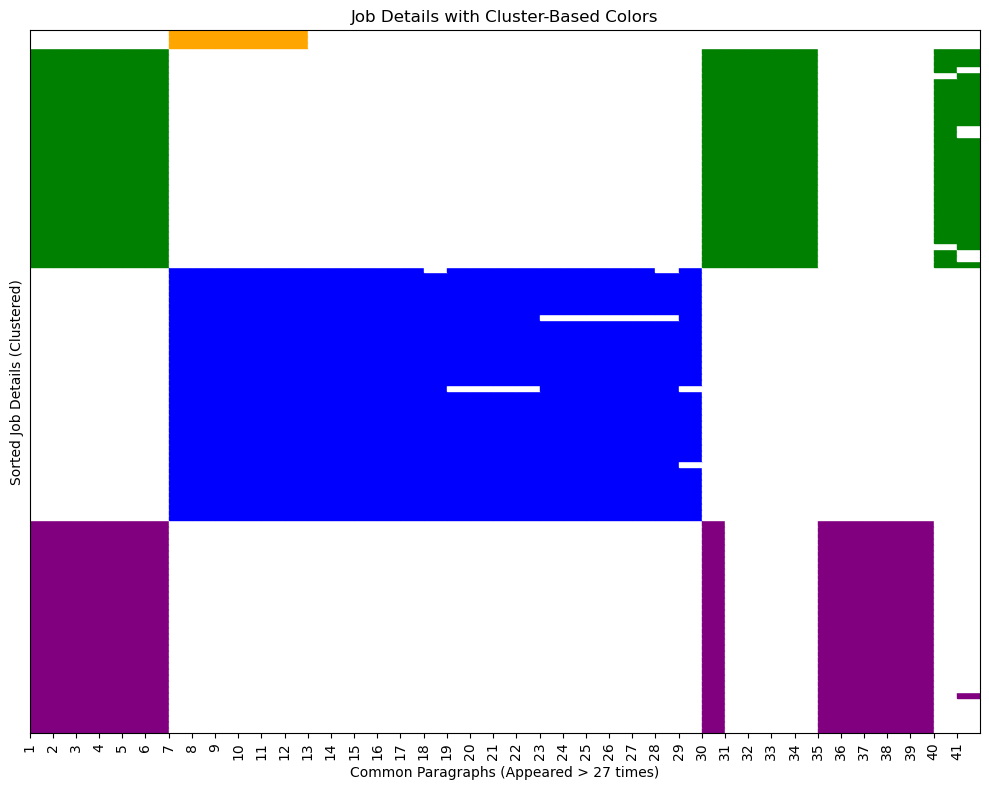

In [10]:
# Creating a new colormap where clusters determine the color
cluster_colormap = {0: 'purple', 1: 'blue', 2: 'green', 3: 'orange'}  # Example mapping, you can adjust colors as needed

# Create a colored matrix where the color depends on the cluster
colored_matrix = sorted_job_details_contains_paragraphs.copy()

for i, row in colored_matrix.iterrows():
    cluster_color = cluster_colormap[sorted_df.loc[i, 'Cluster']]
    for j in range(len(row)):
        if row[j] == 1:  # If the paragraph appears, color it with the cluster color
            colored_matrix.iloc[i, j] = cluster_color
        else:
            colored_matrix.iloc[i, j] = 'white'  # Leave other areas white

# Now create a custom plot to visualize it
plt.figure(figsize=(10, 8))

# Manually assign the colors to each pixel
for i in range(colored_matrix.shape[0]):
    for j in range(colored_matrix.shape[1]):
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color=colored_matrix.iloc[i, j]))

plt.xlim(0, colored_matrix.shape[1])
plt.ylim(0, colored_matrix.shape[0])
plt.xlabel('Common Paragraphs (Appeared > 27 times)')
plt.ylabel('Sorted Job Details (Clustered)')
plt.title('Job Details with Cluster-Based Colors')
plt.xticks(ticks=range(len(filtered_paragraphs)), labels=range(1, len(filtered_paragraphs)+1), rotation=90)
plt.yticks([])  # Hide y-axis labels
plt.tight_layout()
plt.show()

